In [1]:
import matplotlib.colors
import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

import seaborn as sns
sns.set_style("whitegrid")

import urllib3
import os
import matplotlib
import pickle

from sklearn.preprocessing import LabelEncoder

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
lpmc = pd.read_csv('../../data/LPMC/trips.csv')

files = ['../../data/synthetic/nomis/Central London.csv',
         '../../data/synthetic/nomis/East London.csv',
         '../../data/synthetic/nomis/North London.csv',
         '../../data/synthetic/nomis/South London.csv',
         '../../data/synthetic/nomis/West London.csv']

colors = [(0.6627450980392157, 0.6627450980392157, 0.6627450980392157, 1.0), (1.0, 0.0, 0.0, 0.0)]
sns.set_palette(colors)

In [3]:
df = pd.concat([pd.read_csv(f) for f in files])

# Age

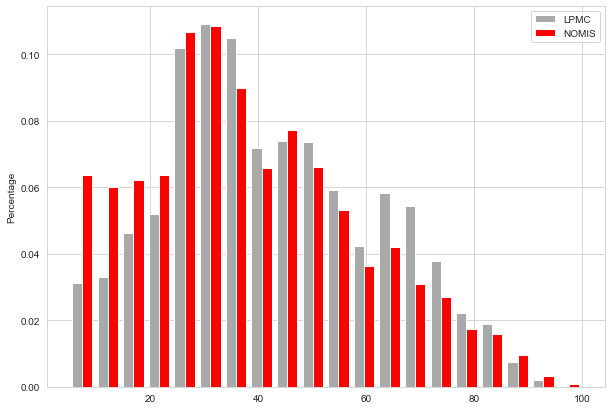

In [6]:
vals = [lpmc['age'], df['age']]
weights = [np.ones_like(v)/len(v) for v in vals]

plt.figure(figsize=(10,7))

if len(vals) > 1:
    bins = np.histogram(np.hstack((vals[0],vals[1])), bins=20)[1]
else:
    bins = np.histogram(vals[0], bins=20)[1]

test = plt.hist(vals,
         bins=bins, weights = weights,
         label=['LPMC', 'NOMIS'])

plt.legend()
plt.ylabel('Percentage')
plt.savefig('../../figures/nomis/age.png', bbox_inches='tight')
plt.savefig('../../figures/nomis/age.pdf', bbox_inches='tight')

In [7]:
test[1]

array([  5.  ,   9.75,  14.5 ,  19.25,  24.  ,  28.75,  33.5 ,  38.25,
        43.  ,  47.75,  52.5 ,  57.25,  62.  ,  66.75,  71.5 ,  76.25,
        81.  ,  85.75,  90.5 ,  95.25, 100.  ])

In [8]:
delta = test[1][1]-test[1][0]

str_ = ''

for i in range(len(test[0][0])):
    str_ += '{} '.format(i*delta)

    for m in range(2):
        str_ += '{} '.format(test[0][m][i])
    str_ += '\n'

print(str_)

0.0 0.031353525792711834 0.06367457150372234 
4.75 0.03306909607193376 0.060252984327234305 
9.5 0.046202082347370776 0.06220406976845534 
14.25 0.05188121154755976 0.06370754239456772 
19.0 0.10186938002838986 0.1066054410409914 
23.75 0.10902744912446138 0.10848201226877147 
28.5 0.10482725982015495 0.08994947013137039 
33.25 0.07193563653572715 0.06574118694675435 
38.0 0.07388783719829206 0.07712445297988546 
42.75 0.07353289162328025 0.06602565979363217 
47.5 0.059275911026972494 0.053195631066774274 
52.25 0.04229768102224085 0.03640790847699371 
57.0 0.05821107430193706 0.041951238426161885 
61.75 0.05436583057264244 0.030908759521599105 
66.5 0.037979176526263814 0.026903060041526206 
71.25 0.02218409843823821 0.01739662900334371 
76.0 0.0187529578797907 0.015858998534270974 
80.75 0.007335541883577434 0.009486912270824432 
85.5 0.0020113582584002643 0.00318564748104877 
90.25 0.0 0.0009378240214337197 



# Regions

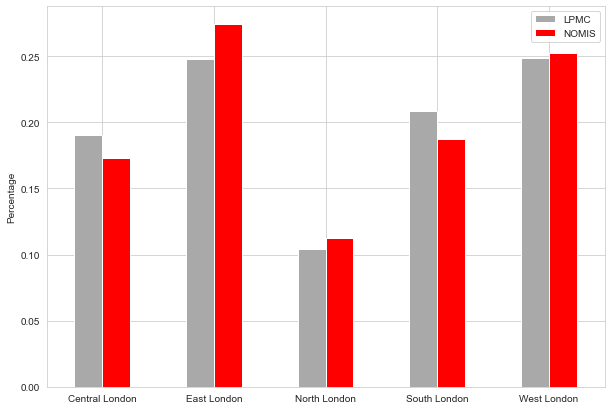

In [11]:
probs = [lpmc['hh_region'].value_counts(normalize=True), df['hh_region'].value_counts(normalize=True)]

labels = ['LPMC', 'NOMIS']

dct = {}
for l in labels:
    dct[l] = []

idx = np.sort(probs[0].index)

for i in idx:
    for j, l in enumerate(labels):
        try:
            val = probs[j].loc[i]
        except:
            val = 0
        dct[l].append(val)


tmp_df = pd.DataFrame(dct, index=idx)

test = tmp_df.plot(figsize=(10,7), kind='bar')

plt.legend()
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.savefig('../../figures/nomis/region.png', bbox_inches='tight')
plt.savefig('../../figures/nomis/region.pdf', bbox_inches='tight')

In [17]:
tmp_df

,LPMC,NOMIS
Central London,0.190606,0.173336
East London,0.247575,0.274000
North London,0.104295,0.112749
South London,0.208885,0.187457
West London,0.248639,0.252457


# Purpose

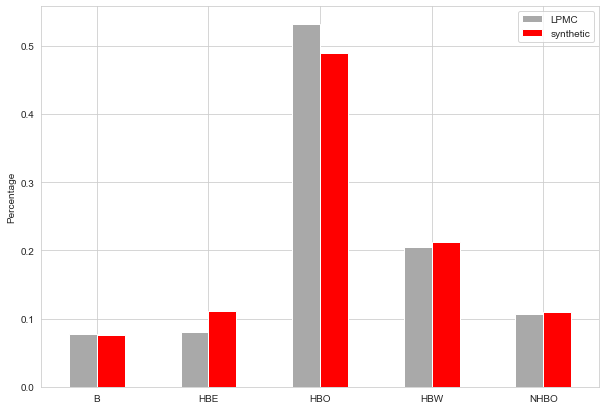

In [18]:
probs = [lpmc['purpose'].value_counts(normalize=True), df['purpose'].value_counts(normalize=True)]

labels = ['LPMC', 'synthetic']

dct = {}
for l in labels:
    dct[l] = []

idx = np.sort(probs[0].index)

for i in idx:
    for j, l in enumerate(labels):
        try:
            val = probs[j].loc[i]
        except:
            val = 0
        dct[l].append(val)


tmp_df = pd.DataFrame(dct, index=idx)

tmp_df.plot(figsize=(10,7), kind='bar')

plt.legend()
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.savefig('../../figures/nomis/purpose.png', bbox_inches='tight')
plt.savefig('../../figures/nomis/purpose.pdf', bbox_inches='tight')

In [19]:
tmp_df

,LPMC,synthetic
B,0.077792,0.076497
HBE,0.080099,0.111798
HBO,0.531235,0.489211
HBW,0.204271,0.212485
NHBO,0.106602,0.110008


# Faretype

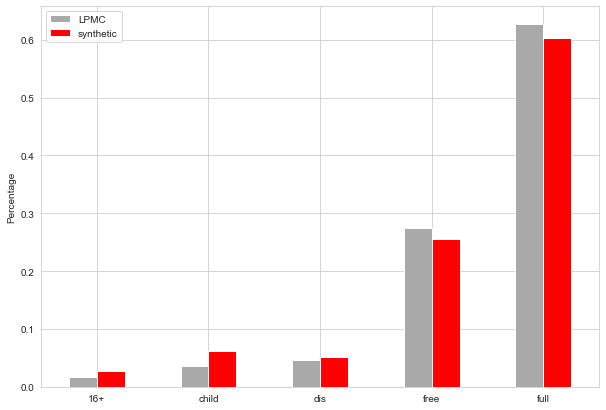

In [20]:
col = 'faretype'

probs = [lpmc[col].value_counts(normalize=True), df[col].value_counts(normalize=True)]

labels = ['LPMC', 'synthetic']

dct = {}
for l in labels:
    dct[l] = []

idx = np.sort(probs[0].index)

for i in idx:
    for j, l in enumerate(labels):
        try:
            val = probs[j].loc[i]
        except:
            val = 0
        dct[l].append(val)


tmp_df = pd.DataFrame(dct, index=idx)

tmp_df.plot(figsize=(10,7), kind='bar')

plt.legend()
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.savefig('../../figures/nomis/faretype.png', bbox_inches='tight')
plt.savefig('../../figures/nomis/faretype.pdf', bbox_inches='tight')

In [21]:
tmp_df

,LPMC,synthetic
16+,0.016150,0.027114
child,0.035376,0.062094
dis,0.046735,0.052153
free,0.275142,0.254786
full,0.626597,0.603854


# distance

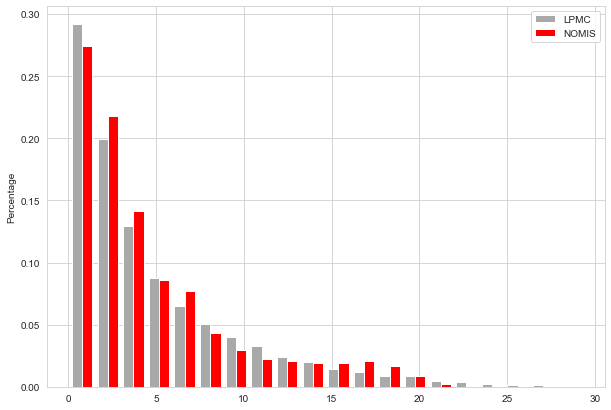

In [7]:
vals = [lpmc['distance'][lpmc['distance']<=30000]/1000, df['distance'][df['distance']<=30000]/1000]
weights = [np.ones_like(v)/len(v) for v in vals]

plt.figure(figsize=(10,7))

if len(vals) > 1:
    bins = np.histogram(np.hstack((vals[0],vals[1])), bins=20)[1]
else:
    bins = np.histogram(vals[0], bins=20)[1]

test = plt.hist(vals,
         bins=bins, weights = weights,
         label=['LPMC', 'NOMIS'])

plt.legend()
plt.ylabel('Percentage')
plt.savefig('../../figures/nomis/distance.png', bbox_inches='tight')
plt.savefig('../../figures/nomis/distance.pdf', bbox_inches='tight')

In [8]:
delta = test[1][1]-test[1][0]

str_ = ''

for i in range(len(test[0][0])):
    str_ += '{} '.format(i*delta)

    for m in range(2):
        str_ += '{} '.format(test[0][m][i])
    str_ += '\n'

print(str_)

0.0 0.29166913375571146 0.27390211549158255 
1.4582 0.19930132038599824 0.21833231651103135 
2.9164 0.12972940967501578 0.14116645209175976 
4.3746 0.0874533720173486 0.08630038380731597 
5.8328 0.06465746935879801 0.0770649734925235 
7.2909999999999995 0.05056545680623947 0.04315625854760652 
8.7492 0.04026289300731012 0.02954890809636246 
10.2074 0.03303925632070448 0.022449352095592734 
11.6656 0.024216945941161527 0.020462262441422796 
13.1238 0.01995381609332869 0.019414183760764536 
14.581999999999999 0.014328853099660366 0.019279003108026105 
16.0402 0.011901237491866667 0.02116124532909558 
17.4984 0.00899994078986932 0.017056765059784262 
18.956599999999998 0.008763100242767496 0.00840375256220005 
20.4148 0.005032861625913765 0.0021016964710415253 
21.872999999999998 0.0035526082065273634 0.0001965065099039931 
23.3312 0.0025460358813446105 3.824623348025469e-06 
24.7894 0.0016578838297127696 0.0 
26.2476 0.0014802534193864014 0.0 
27.7058 0.0008881520516317298 0.0 

